In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

from net import AutoEncoder
from net import Classifier


In [8]:
def imshow(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [9]:
ae_model = 'SGD_0.1_MSE_batch100_100epoch_div8_unbalanced'
cls_model = 'cls_SGD_0.1_MSE_batch100_100epoch_div8_unbalanced'


## Performance of the AutoEncoder model

In [10]:
model_path = f'./ckpt/{ae_model}/model_9.pth'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=56, shuffle=False, num_workers=2, drop_last=True)

model = AutoEncoder()
model.load_state_dict(torch.load(model_path))
model.eval()


Files already downloaded and verified


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=1536, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1536, out_features=768, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=768, out_features=384, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=384, out_features=768, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=768, out_features=1536, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1536, out_features=3072, bias=True)
    (5): Tanh()
  )
)

In [11]:
iteration = iter(testloader)

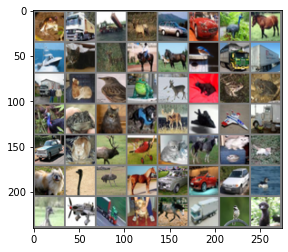

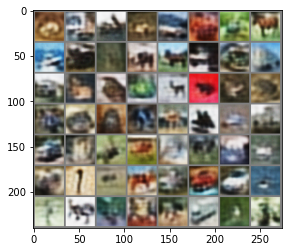

In [12]:
images, _ = next(iteration)

imshow(images)

images = images.reshape(-1, 3 * 32 * 32)

reconstructed = model(images)
reconstructed = reconstructed.reshape(-1, 3, 32, 32)

imshow(reconstructed)


## Performance of overall process

In [6]:
ae_model_path = f'./ckpt/{ae_model}/model_9.pth'
cls_model_path = f'./ckpt/{cls_model}/model_9.pth'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=56, shuffle=False, num_workers=2, drop_last=True)

ae = AutoEncoder()
ae.load_state_dict(torch.load(ae_model_path))
ae.eval()

cls_net = Classifier()
cls_net.state_dict(torch.load(cls_model_path))
cls_net.eval()    


Files already downloaded and verified


Classifier(
  (ae): AutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=3072, out_features=1536, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=1536, out_features=768, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=768, out_features=384, bias=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=384, out_features=768, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=768, out_features=1536, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1536, out_features=3072, bias=True)
      (5): Tanh()
    )
  )
  (cls): Sequential(
    (0): Linear(in_features=384, out_features=192, bias=True)
    (1): ReLU()
    (2): Linear(in_features=192, out_features=10, bias=True)
  )
)

In [ ]:
for counter, (image, label) in enumerate(testloader):
  